<a href="https://colab.research.google.com/github/thisisphume/ETF_Analysis_Testing/blob/main/get_ETF_data_and_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

https://www.udemy.com/course/importing-free-financial-data-with-python/learn/lecture/16037022#overview

In [ ]:
!pip install yfinance==0.1.52

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

import bs4 as bs
import requests
import numpy as np

# EFT and Mutual Fund List

In [3]:
### Getting the list of ETF
etf_largest = pd.read_html('https://etfdb.com/compare/market-cap/')[0]
etf_popular = pd.read_html('https://etfdb.com/compare/volume/')[0]
etf_lowExpense = pd.read_html('https://etfdb.com/compare/lowest-expense-ratio/')[0]
etf_highExpense = pd.read_html('https://etfdb.com/compare/highest-expense-ratio/')[0]
etf_topDiv = pd.read_html('https://etfdb.com/compare/dividend-yield/')[0]
etf_highPE = pd.read_html('https://etfdb.com/compare/highest-pe-ratio/')[0]
etf_lowPE = pd.read_html('https://etfdb.com/compare/lowest-pe-ratio/')[0]

etf = pd.concat([etf_largest[['Symbol','Name']] 
                 , etf_popular[['Symbol','Name']]
                 , etf_lowExpense[['Symbol','Name']]
                 , etf_highExpense[['Symbol','Name']]
                 , etf_topDiv[['Symbol','Name']]
                 , etf_highPE[['Symbol','Name']]
                 , etf_lowPE[['Symbol','Name']]]).drop_duplicates()
print ("Number of ETF: ", len(etf.Symbol.values.tolist()))


### Getting the list of mutual funds
mf_list = pd.read_html('https://www.marketwatch.com/tools/mutual-fund/top25largest')[0]
print ("Number of Mutual Funds: ", len(mf_list.Symbol.values.tolist()))


### Getting the data
print ("\n", "Retrieving the data....")

etf_data = yf.download(etf.Symbol.values.tolist(), start='2017-01-01')
etf_close = etf_data['Adj Close']
etf_close = etf_close.iloc[:-1,]
print ("Length of the ETF data: ", len(etf_close))

mf_data = yf.download(mf_list.Symbol.values.tolist(), start='2017-01-01')
mf_close = mf_data['Adj Close']
mf_close = mf_close.iloc[:-1,]
print ("Length of the Mutual Funds data: ", len(mf_close))

Number of ETF:  564
Number of Mutual Funds:  25

 Retrieving the data....
[*********************100%***********************]  564 of 564 completed
Length of the ETF data:  1025
[*********************100%***********************]  25 of 25 completed
Length of the Mutual Funds data:  1026


# Any Missing Data

Text(0, 0.5, 'Number of tickers')

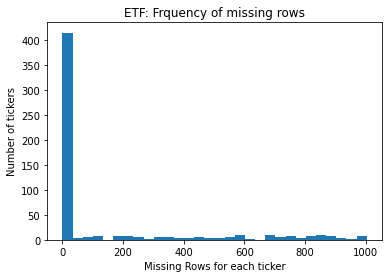

In [14]:
ticker_null = pd.DataFrame(columns=['ticker','number_of_missing', 'last_missing'])
i = 0
for ticker in etf_close.columns:
  price = etf_close[[ticker]]
  num_null = len(price[price.isnull().any(axis=1)])
  if num_null != 0:
    last_missing = price[price.isnull().any(axis=1)].tail(1).index[0]
  else:
    last_missing = np.nan
  temp_df = pd.DataFrame({"ticker":ticker, "number_of_missing":num_null, "last_missing":last_missing}, index=[i])
  ticker_null = pd.concat([ticker_null, temp_df])
  i += 1


ax = ticker_null.number_of_missing.plot.hist(title="ETF: Frquency of missing rows", bins=30)
ax.set_xlabel("Missing Rows for each ticker")
ax.set_ylabel("Number of tickers")

Text(0.5, 1.0, 'Historical Price of 413 ETFs (starting at $100)')

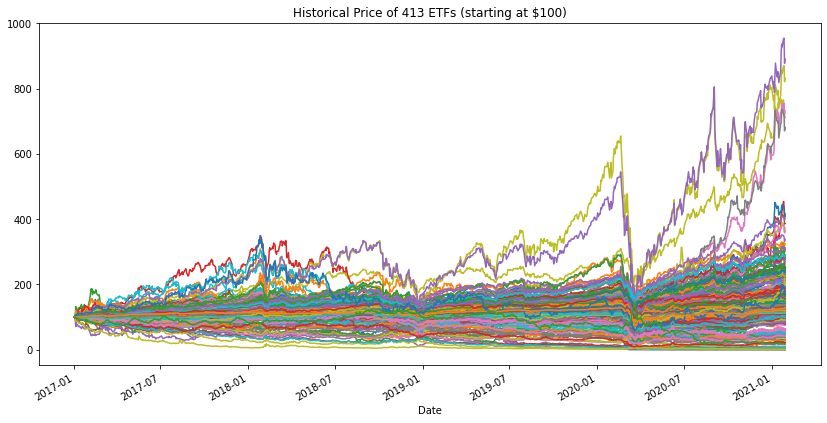

In [15]:
ticker_no_missing_data = ticker_null[ticker_null.number_of_missing < 10].ticker.values
plot_etf_df = etf_close[ticker_no_missing_data]
ax = plot_etf_df.div(plot_etf_df.iloc[0]).mul(100).plot(figsize=(14,7), legend=None )
ax.set_title("Historical Price of {} ETFs (starting at $100)".format(len(ticker_no_missing_data)))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=15)

Text(0, 0.5, 'Number of tickers')

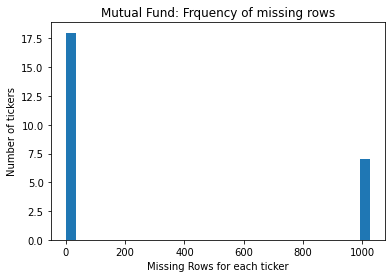

In [16]:
ticker_null = pd.DataFrame(columns=['ticker','number_of_missing', 'last_missing'])
i = 0
for ticker in mf_close.columns:
  price = mf_close[[ticker]]
  num_null = len(price[price.isnull().any(axis=1)])
  if num_null != 0:
    last_missing = price[price.isnull().any(axis=1)].tail(1).index[0]
  else:
    last_missing = np.nan
  temp_df = pd.DataFrame({"ticker":ticker, "number_of_missing":num_null, "last_missing":last_missing}, index=[i])
  ticker_null = pd.concat([ticker_null, temp_df])
  i += 1


ax = ticker_null.number_of_missing.plot.hist(title="Mutual Fund: Frquency of missing rows", bins=30)
ax.set_xlabel("Missing Rows for each ticker")
ax.set_ylabel("Number of tickers")

Text(0.5, 1.0, 'Historical Price of 18 MF (starting at $100)')

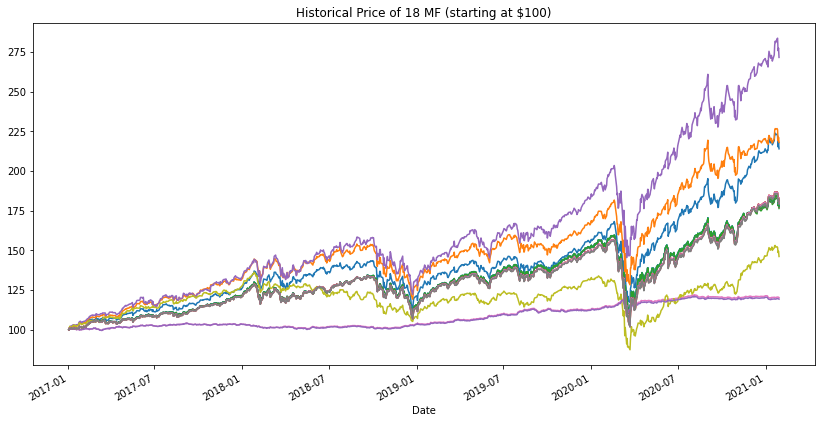

In [17]:
ticker_no_missing_data = ticker_null[ticker_null.number_of_missing < 10].ticker.values
plot_etf_df = mf_close[ticker_no_missing_data]
ax = plot_etf_df.div(plot_etf_df.iloc[0]).mul(100).plot(figsize=(14,7), legend=None )
ax.set_title("Historical Price of {} MF (starting at $100)".format(len(ticker_no_missing_data)))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=15)

# Exporting the data

In [ ]:
plot_etf_df.to_csv('20210127.{}ETF_historical_price_data.csv'.format(len(ticker_no_missing_data)), index=True)
mf_close.to_csv('20210127.Mutual_Fund_historical_price_data.csv', index=True)

In [ ]:
ticker_null.to_csv('20210127.counting_missing_data.csv', index=False)